# git2net analysis for the networkx repository

First we import the required packages

In [2]:
import pygit2 as git2
import os
import shutil
import git2net
import pathpy as pp
import sqlite3
import pandas as pd
from datetime import date, datetime, timedelta
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import json 
import math
import copy
import networkx as nx
import random
import warnings
from statistics import mean, stdev

import gambit
import numpy as np

#git_repo_url = 'https://github.com/microsoft/cntk'
#git_repo_url = 'https://github.com/bytecodealliance/wasmtime'
git_repo_url = 'https://github.com/pandas-dev/pandas.git'
#git_repo_url = 'https://github.com/curl/curl.git'
#git_repo_url = 'https://github.com/networkx/networkx.git'
#git_repo_url = 'https://github.com/numpy/numpy.git'
#git_repo_url = 'https://github.com/deepcharles/ruptures.git'
#git_repo_url = 'https://github.com/mwaskom/seaborn.git'
#git_repo_url = 'https://github.com/Juniper/py-junos-eznc.git'

repo_owner = 'pandas-dev'
repo_name = 'pandas'
local_directory = '.'
git_repo_dir = 'repos/{r}4analysis'.format(r=repo_name)
#sqlite_db_file = 'databases/{o}/{r}/{r}.db'.format(o=repo_owner, r=repo_name)
sqlite_db_file = 'databases/{r}/{r}_rename.db'.format(r=repo_name)
warnings.filterwarnings('ignore')

# Commit stats

Min date:  2009-07-31 15:07:16
Max date:  2021-03-06 20:40:22


<BarContainer object of 4237 artists>

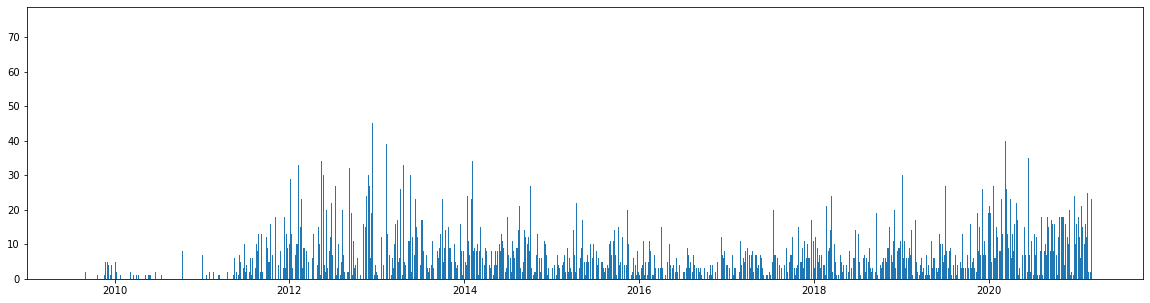

In [119]:
db = sqlite3.connect(sqlite_db_file)
max_date = datetime.strptime(pd.read_sql_query("SELECT max(committer_date) as max FROM commits", db)['max'].item(), '%Y-%m-%d %H:%M:%S')
min_date = datetime.strptime(pd.read_sql_query("SELECT min(committer_date) as min FROM commits", db)['min'].item(), '%Y-%m-%d %H:%M:%S')

print('Min date: ', min_date)
print('Max date: ', max_date)

pdCommits = pd.read_sql_query("SELECT * FROM commits", db)

days = {(min_date+timedelta(days=x)).date() : 0 for x in range((max_date-min_date).days + 1)}

commit_dates = pdCommits['committer_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()).value_counts()

for key in commit_dates.keys():
    days[key] = commit_dates.get(key)

keys = days.keys()
values = days.values()
plt.figure(figsize=(20,5))
plt.bar(keys, values)

0
1
2
3
4
5
6
7
[[ 154  196  287   94  117   94  193  140  101  143  196  262  222  217
   143  153  127  138  154  211  166  156  182  266  350  327  458  346
   363  370  278  259  208  126  205  313  395  344  305  301]
 [ 274  301  402  257  238  354  348  278  241  369  420  420  370  362
   241  301  296  319  349  415  372  342  398  452  471  440  729  520
   495  491  490  534  464  273  474  562  694  568  549  451]
 [ 303  314  407  260  247  381  371  320  249  379  433  439  374  375
   249  308  337  339  358  424  385  364  443  580  492  450  742  528
   502  502  496  547  521  306  506  586  732  625  597  484]
 [ 303  317  422  266  268  438  512  330  249  382  434  439  374  376
   249  312  385  341  359  427  390  410  443  580  500  495  867  538
   515  506  518  569  527  309  542  595  740  629  615  496]
 [ 366  405  496  326  350  523  577  401  344  501  522  505  448  439
   355  397  487  438  462  486  509  497  598  640  574  590  948  623
   709  650 

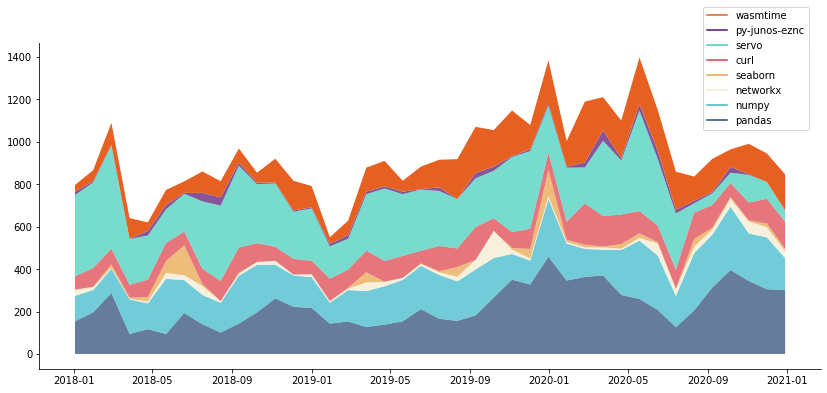

In [84]:
from matplotlib.dates import date2num
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

x = list(keys)[-1231:-111]

y_stack = []
for j in range(8):
    y_stack.append(list(days[j].values())[-1231:-111])



y = []
x_w = []
for i in range(8):
    print(i)
    y.append([])
    for j in range(0, len(x), 28):
        y[i].append(sum(y_stack[i][j:j+27]))

for j in range(0, len(x), 28):
    x_w.append(x[j])

y = np.cumsum(y, axis=0)
print(y)
print(len(x_w))
ax1.fill_between(x_w, 0, y[0,:], facecolor="#254573", alpha=.7)
ax1.fill_between(x_w, y[0,:], y[1,:], facecolor="#37B6C9", alpha=.7)
ax1.fill_between(x_w, y[1,:], y[2,:], facecolor="#F4EBCE", alpha=.7)
ax1.fill_between(x_w, y[2,:], y[3,:], facecolor="#E9A243", alpha=.7)
ax1.fill_between(x_w, y[3,:], y[4,:], facecolor="#DE3A44", alpha=.7)
ax1.fill_between(x_w, y[4,:], y[5,:], facecolor="#3DCDB8", alpha=.7)
ax1.fill_between(x_w, y[5,:], y[6,:], facecolor="#540D6E", alpha=.7)
ax1.fill_between(x_w, y[6,:], y[7,:], facecolor="#E66021")

l1 = mlines.Line2D([], [], color='#254573', markersize=15, label='pandas')
l2 = mlines.Line2D([], [], color='#37B6C9', markersize=15, label='numpy')
l3 = mlines.Line2D([], [], color='#F4EBCE', markersize=15, label='networkx')
l4 = mlines.Line2D([], [], color='#E9A243', markersize=15, label='seaborn')
l5 = mlines.Line2D([], [], color='#DE3A44', markersize=15, label='curl')
l6 = mlines.Line2D([], [], color='#3DCDB8', markersize=15, label='servo')
l7 = mlines.Line2D([], [], color='#540D6E', markersize=15, label='py-junos-eznc')
l8 = mlines.Line2D([], [], color='#E66021', markersize=15, label='wasmtime')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.legend(handles=[l8, l7, l6, l5, l4, l3, l2, l1], bbox_to_anchor=(0.85, 1.11), loc='upper left', borderaxespad=0.)

ax.xaxis_date()
#ax.autoscale(tight=True)

plt.show()

## Bipartite networks
### Converting bipartite network into WOMP (weighted one-mode projection)

In [3]:
def collab_network(sqlite_db_file, git_repo_dir, t, node_info, min_date, max_date, file_base=True):
    if file_base:
        start = int(datetime.timestamp(min_date))
        end = int(datetime.timestamp(max_date))

        n = pp.Network.from_temporal_network(t, min_time=start, max_time=end)
        
        n = remove_duplicate_filenames(n, git_repo_dir)
        n = add_weights(n, node_info)
        
        new_n = copy.deepcopy(n)

        for node1 in n.nodes:
            if node_info['class'][node1] == 'author':
                for node2 in n.nodes:
                    if node_info['class'][node2] == 'author' and node1 != node2:
                        intersect = n.successors[node1].intersection(n.successors[node2])
                        w = 0
                        for file in intersect:
                            #print((node1, file), ':', n.edges[(node1, file)])
                            w = w + n.edges[(node1, file)]['wijLR']
                        if w > 0:
                            new_n.add_edge(node1, node2, weight=w)

        for node in n.nodes:
            if node_info['class'][node] == 'file':
                new_n.remove_node(node)

        return new_n
    else:
        n, node_info, edge_info = git2net.get_coauthorship_network(sqlite_db_file, time_from=min_date, time_to=max_date)
        return n

In [4]:
def remove_duplicate_filenames(n, git_repo_dir):
    all_files = []
    for path, subdirs, files in os.walk(git_repo_dir):
        for name in files:
            all_files.append(name)

    duplicates = [file for file in all_files if all_files.count(file) > 1]
    remove_files = set(duplicates)

    new_n = copy.deepcopy(n)
    for node in new_n.nodes:
        if node in remove_files:
            n.remove_node(node)
    del new_n
    return n

In [5]:
def duplicate_filenames(git_repo_dir):
    all_files = []
    for path, subdirs, files in os.walk(git_repo_dir):
        for name in files:
            all_files.append(name)

    duplicates = [file for file in all_files if all_files.count(file) > 1]
    remove_files = set(duplicates)
    print(len(remove_files))
    
    #keep_nodes = [f for f in all_files if f not in remove_files]
    #print(len(keep_nodes))
    #print(keep_nodes)
    
    #t = t.filter_nodes(keep_nodes)

    #new_n = copy.deepcopy(n)
    #for node in new_n.nodes:
    #    if node in remove_files:
    #        n.remove_node(node)
    #del new_n
    return remove_files

In [6]:
def add_weights(n, node_info):
    for node in n.nodes:
        if node_info['class'][node] == 'author':
            s = 0
            for successor in n.successors[node]:
                for key in n.edges:
                    if key[0] == node and key[1] == successor:
                        s = s + n.edges[key]['weight']

        n.nodes[node]['WiL'] = s
    for edge in n.edges:
        n.edges[edge]['wijLR'] = n.edges[edge]['weight'] / n.nodes[edge[0]]['WiL']
    
    return n

In [7]:
def collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, min_date, max_date, duplicate_files, file_base=True, is_temp=True):
    if file_base:
        start = int(datetime.timestamp(min_date))
        end = int(datetime.timestamp(max_date))
        
        #print('1. From temporal network...')
        if is_temp:
            n = pp.Network.from_temporal_network(t, min_time=start, max_time=end)
        else:
            n = t
        
        #print('2. Remove duplicate files... SKIPPED')
        #n = remove_duplicate_filenames(n, git_repo_dir)
        
        #print('3. New empty network')
        new_n = pp.Network(directed=False)
        
        #print('4. Add authors to network')
        nn = copy.deepcopy(n.nodes)
        for node in nn:
            if node_info['class'][node] != 'file':
                new_n.add_node(node)
            elif node in duplicate_files:
                n.remove_node(node)
        
        #new_n = new_n.to_undirected()  
        
        #print('5. Jaccard loop')
        visited_nodes = []
        for node1 in n.nodes:
            if node_info['class'][node1] == 'author':
                for node2 in n.nodes:
                    if node_info['class'][node2] == 'author' and node1 != node2 and not node2 in visited_nodes:
                        intersect = n.successors[node1].intersection(n.successors[node2])
                        w_min = 0
                        w_max = 0
                        for file in intersect:
                            #print((node1, file), ':', n.edges[(node1, file)])
                            w_min = w_min + min(n.edges[(node1, file)]['weight'], n.edges[(node2, file)]['weight'])
                            w_max = w_max + max(n.edges[(node1, file)]['weight'], n.edges[(node2, file)]['weight'])
                        if w_max > 0:
                            new_n.add_edge(node1, node2, weight=w_min/w_max)
                visited_nodes.append(node1)
                
                
        return new_n
    else:
        n, node_info, edge_info = git2net.get_coauthorship_network(sqlite_db_file, time_from=min_date, time_to=max_date)
        return n

In [8]:
def pathpy_to_networkx(n):
    G = nx.Graph()
    for node in n.nodes:
        G.add_node(node)
    
    for n1, n2 in n.edges:
        G.add_edge(n1, n2, weight=n.edges[(n1, n2)]['weight'])
        
    return G

In [9]:
def network_stats_nx(G):
    d = {}

    degrees = dict(G.degree())

    clust_coeff = nx.clustering(G, weight='weight')

    deg_centrality = nx.degree_centrality(G)
    try:
        max_dc = max(deg_centrality.values())
    except ValueError:
        max_dc = 0
    sum_dc = 0    
    for node in deg_centrality:
        sum_dc = sum_dc + (max_dc - deg_centrality[node])
    
    G_n = nx.Graph()
    for node in G.nodes:
        G_n.add_node(node)
    for u,v,a in G.edges(data=True):
        G_n.add_edge(u,v, weight=a['weight']*(-1)+1)
    shortest_paths = nx.shortest_path_length(G_n, weight='weight')
    s_p = 0
    i = 0
    for start, targets in shortest_paths:
        s_p = s_p + sum(targets.values())
        i = i + len(targets.values())
    
    k_core = len([x for x in nx.core_number(G) if nx.core_number(G)[x] >= max(nx.core_number(G).values())*0.8])
    deg_c_core = len([x for x in deg_centrality if deg_centrality[x] >= max(deg_centrality.values())*0.8])
    
    x=[]
    y=[]
    for node in G.nodes:
        if not (G.degree[node] == 0 and clust_coeff[node] == 0):
            x.append(G.degree[node])
            y.append(clust_coeff[node])
    
    d['Number of nodes'] = G.number_of_nodes()
    d['Network density'] = nx.density(G)
    try:
        d['Mean degree'] = sum(degrees.values())/len(degrees.values())
    except ZeroDivisionError:
        d['Mean degree'] = 0
    if G.number_of_nodes() > 2:
        d['Degree centrality'] = sum_dc / (G.number_of_nodes() - 2)
    else:
        d['Degree centrality'] = 0
    try:
        d['Clustering coeff.'] = sum(clust_coeff.values())/len(clust_coeff.values())
    except ZeroDivisionError:
        d['Clustering coeff.'] = 0
    try:
        d['Mean path length'] = s_p / i
    except ZeroDivisionError:
        d['Mean path length'] = 0
    d['Connected components'] = nx.number_connected_components(G)
    d['K-Core count'] = k_core
    d['Degree centrality core'] = deg_c_core
    if G.number_of_nodes() > 0:
        d['Core/periphery (k-core)'] = k_core / G.number_of_nodes()
        d['Core/periphery (degree)'] = deg_c_core / G.number_of_nodes()
    else:
        d['Core/periphery (k-core)'] = 0
        d['Core/periphery (degree)'] = 0
    try:
        d['Hierarchy'] = np.polyfit(x, y, 1)[0]
    except TypeError:
        d['Hierarchy'] = 0
    
    return d

In [21]:
G_t = nx.Graph()
G_x = nx.Graph()
G_t.add_edge(1,2,weight=7)
G_t.add_edge(2,3,weight=10)
for u,v,a in G_t.edges(data=True):
    G_x.add_edge(u,v, weight=a['weight']*(-1))
    print(u, v, a)
    
nx.all_simple_paths(G_x, )

1 2 {'weight': 7}
2 3 {'weight': 10}
1
2
3


In [10]:
def generate_random_network(n, node_info):
    rnet = pp.Network(directed=True)
    files = [x for x in node_info['class'] if node_info['class'][x] == 'file' and x in n.nodes]
    #print(len(files))
    authors = [x for x in node_info['class'] if node_info['class'][x] == 'author' and x in n.nodes]
    #print(len(authors))
    
    for edge in n.edges:
        rnet.add_edge(random.choice(authors), random.choice(files))
    
    return rnet

In [107]:
t, node_info, edge_info = git2net.get_bipartite_network(sqlite_db_file)
nj1 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2015, 12, 31), True)
nj2 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 12, 31), True)
nj3 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 6, 30), True)
nj4 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 3, 31), True)
nj5 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 1, 31), True)
nj6 = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 1, 8), True)
n1 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2015, 12, 31), True)
n2 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 12, 31), True)
n3 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 6, 30), True)
n4 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 3, 31), True)
n5 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 1, 31), True)
n6 = collab_network(sqlite_db_file, git_repo_dir, t, node_info, datetime(2014, 1, 1), datetime(2014, 1, 8), True)

In [295]:
t, node_info, edge_info = git2net.get_bipartite_network(sqlite_db_file, time_from=datetime(2019, 1, 1), time_to=datetime(2021, 3, 31))

### Network statistics over time plots

In [11]:
repos = {
    'networkx': {
        'owner': 'networkx',
        'repo': 'repos/networkx4analysis',
        'db_file': 'databases/networkx/networkx_rename.db'
    },
    'seaborn': {
        'owner': 'mwaskom',
        'repo': 'repos/seaborn4analysis',
        'db_file': 'databases/seaborn/seaborn_rename.db'
    },
    'curl': {
        'owner': 'curl',
        'repo': 'repos/curl',
        'db_file': 'databases/curl/curl/curl.db'
    },
    'servo': {
        'owner': 'servo',
        'repo': 'repos/servo4analysis',
        'db_file': 'databases/servo/servo_rename.db'
    },
    'py-junos-eznc': {
        'owner': 'Juniper',
        'repo': 'repos/py-junos-eznc',
        'db_file': 'databases/Juniper/py-junos-eznc/py-junos-eznc.db'
    },
    'wasmtime': {
        'owner': 'bytecodealliance',
        'repo': 'repos/wasmtime4analysis',
        'db_file': 'databases/wasmtime/wasmtime_rename.db'
    },
    'pandas': {
        'owner': 'pandas-dev',
        'repo': 'repos/pandas4analysis',
        'db_file': 'databases/pandas/pandas_rename.db'
    },
    'numpy': {
        'owner': 'numpy',
        'repo': 'repos/numpy4analysis',
        'db_file': 'databases/numpy/numpy_rename.db'
    }
}
stats = {}
random_stats = {}
x = {}

for repo in repos:
    print(repo)
    sqlite_db_file = repos[repo]['db_file']

    db = sqlite3.connect(sqlite_db_file)
    max_date = datetime.strptime(pd.read_sql_query("SELECT max(committer_date) as max FROM commits", db)['max'].item(), '%Y-%m-%d %H:%M:%S')
    #min_date = datetime.strptime(pd.read_sql_query("SELECT min(committer_date) as min FROM commits", db)['min'].item(), '%Y-%m-%d %H:%M:%S')
    #max_date = datetime.strptime('2020-12-31 00:00:00', '%Y-%m-%d %H:%M:%S')
    min_date = datetime.strptime('2018-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')

    print('Min date: ', min_date)
    print('Max date: ', max_date)

    t, node_info, edge_info = git2net.get_bipartite_network(sqlite_db_file, time_from=min_date, time_to=max_date)
    print('0. Remove duplicate files')
    duplicate_files = duplicate_filenames(repos[repo]['repo'])

    timespan = timedelta(days=28) # Timespan to be considered for the stats
    days = {(min_date+timedelta(days=x)).date() : 0 for x in range(0, (max_date-min_date-timespan).days + 1, 7)}
    stats[repo] = []
    random_stats[repo] = []
    x[repo] = []

    stat_names = [
        'Number of nodes', 'Network density', 'Mean degree', 'Degree centrality', 'Clustering coeff.', 'Mean path length', 
        'Connected components', 'K-Core count', 'Core/periphery (k-core)', 'Degree centrality core', 'Core/periphery (degree)',
        'Hierarchy'
    ]

    for day in days:
        print(day.strftime('%Y-%m-%d'))
        x[repo].append(day)
        start = datetime.combine(day, datetime.min.time())
        end = datetime.combine(day+timespan, datetime.min.time())
        #n = collab_network(sqlite_db_file, git_repo_dir, t, node_info, day, day+timespan, True)
        n_bip = pp.Network.from_temporal_network(t, min_time=int(datetime.timestamp(start)), max_time=int(datetime.timestamp(end)))
        rstat = []
        for i in range(10):
            rnet_bip = generate_random_network(n_bip, node_info)
            rnet = collab_network_jaccard(sqlite_db_file, git_repo_dir, rnet_bip, node_info, start, end, duplicate_files, True, False)
            Gr = pathpy_to_networkx(rnet)
            s = network_stats_nx(Gr)
            rstat.append(s)

        n = collab_network_jaccard(sqlite_db_file, git_repo_dir, t, node_info, start, end, duplicate_files, True)
        G = pathpy_to_networkx(n)
        s=network_stats_nx(G)
        stats[repo].append(s)

        zstat = {}
        for sname in stat_names:
            l = [x[sname] for x in rstat]
            try:
                zstat[sname] = (s[sname] - mean(l)) / stdev(l)
            except ZeroDivisionError:
                zstat[sname] = None
                #zstat[sname] = (s[sname] - mean(l))
        random_stats[repo].append(zstat)

networkx
Min date:  2018-01-01 00:00:00
Max date:  2021-03-08 21:19:46
0. Remove duplicate files
34
2018-01-01
2018-01-08
2018-01-15
2018-01-22


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2018-01-29
2018-02-05
2018-02-12
2018-02-19
2018-02-26
2018-03-05


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-03-12
2018-03-19
2018-03-26
2018-04-02
2018-04-09
2018-04-16
2018-04-23
2018-04-30
2018-05-07
2018-05-14
2018-05-21


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2018-05-28
2018-06-04
2018-06-11
2018-06-18
2018-06-25
2018-07-02
2018-07-09
2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13
2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-5

2018-09-24
2018-10-01
2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31
2019-01-07
2019-01-14


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2019-01-21
2019-01-28
2019-02-04
2019-02-11
2019-02-18
2019-02-25
2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a

2019-05-27
2019-06-03
2019-06-10
2019-06-17
2019-06-24
2019-07-01
2019-07-08
2019-07-15
2019-07-22
2019-07-29
2019-08-05
2019-08-12
2019-08-19


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2019-08-26
2019-09-02
2019-09-09
2019-09-16
2019-09-23
2019-09-30
2019-10-07


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2019-10-14
2019-10-21
2019-10-28
2019-11-04


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-inpu

2019-11-11
2019-11-18
2019-11-25
2019-12-02
2019-12-09
2019-12-16
2019-12-23
2019-12-30


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-01-06
2020-01-13
2020-01-20
2020-01-27
2020-02-03
2020-02-10
2020-02-17
2020-02-24
2020-03-02
2020-03-09
2020-03-16
2020-03-23
2020-03-30
2020-04-06
2020-04-13
2020-04-20
2020-04-27


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2020-05-04
2020-05-11
2020-05-18
2020-05-25
2020-06-01
2020-06-08
2020-06-15
2020-06-22
2020-06-29
2020-07-06
2020-07-13
2020-07-20
2020-07-27
2020-08-03
2020-08-10
2020-08-17
2020-08-24
2020-08-31
2020-09-07


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2020-09-14
2020-09-21
2020-09-28
2020-10-05
2020-10-12
2020-10-19


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2020-10-26
2020-11-02
2020-11-09
2020-11-16
2020-11-23
2020-11-30
2020-12-07
2020-12-14
2020-12-21
2020-12-28
2021-01-04
2021-01-11
2021-01-18
2021-01-25
2021-02-01
2021-02-08
seaborn
Min date:  2018-01-01 00:00:00
Max date:  2021-03-06 17:26:32
0. Remove duplicate files
17
2018-01-01
2018-01-08
2018-01-15
2018-01-22
2018-01-29
2018-02-05
2018-02-12
2018-02-19
2018-02-26
2018-03-05
2018-03-12
2018-03-19
2018-03-26
2018-04-02
2018-04-09
2018-04-16
2018-04-23
2018-04-30


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2018-05-07
2018-05-14
2018-05-21
2018-05-28
2018-06-04
2018-06-11
2018-06-18
2018-06-25
2018-07-02
2018-07-09
2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17
2018-09-24
2018-10-01
2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31
2019-01-07
2019-01-14
2019-01-21
2019-01-28
2019-02-04
2019-02-11
2019-02-18
2019-02-25
2019-03-04
2019-03-11
2019-03-18
2019-03-25


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20
2019-05-27
2019-06-03
2019-06-10
2019-06-17
2019-06-24
2019-07-01
2019-07-08
2019-07-15
2019-07-22
2019-07-29
2019-08-05
2019-08-12
2019-08-19


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2019-08-26
2019-09-02
2019-09-09
2019-09-16
2019-09-23
2019-09-30
2019-10-07
2019-10-14
2019-10-21
2019-10-28
2019-11-04
2019-11-11
2019-11-18
2019-11-25
2019-12-02
2019-12-09
2019-12-16
2019-12-23
2019-12-30
2020-01-06
2020-01-13


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-01-20
2020-01-27
2020-02-03
2020-02-10
2020-02-17
2020-02-24
2020-03-02
2020-03-09
2020-03-16
2020-03-23
2020-03-30
2020-04-06
2020-04-13
2020-04-20


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-04-27
2020-05-04
2020-05-11
2020-05-18
2020-05-25
2020-06-01
2020-06-08
2020-06-15
2020-06-22
2020-06-29


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-07-06
2020-07-13
2020-07-20
2020-07-27
2020-08-03
2020-08-10
2020-08-17
2020-08-24
2020-08-31


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-09-07
2020-09-14
2020-09-21
2020-09-28
2020-10-05
2020-10-12
2020-10-19
2020-10-26
2020-11-02
2020-11-09
2020-11-16
2020-11-23
2020-11-30
2020-12-07


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2020-12-14
2020-12-21
2020-12-28
2021-01-04
2021-01-11
2021-01-18
2021-01-25
2021-02-01
curl


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

Min date:  2018-01-01 00:00:00
Max date:  2021-05-02 12:08:20
0. Remove duplicate files
39
2018-01-01
2018-01-08
2018-01-15
2018-01-22
2018-01-29
2018-02-05
2018-02-12
2018-02-19
2018-02-26
2018-03-05
2018-03-12
2018-03-19
2018-03-26
2018-04-02
2018-04-09
2018-04-16
2018-04-23
2018-04-30
2018-05-07
2018-05-14
2018-05-21
2018-05-28
2018-06-04
2018-06-11
2018-06-18
2018-06-25
2018-07-02
2018-07-09
2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13
2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17
2018-09-24
2018-10-01
2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31
2019-01-07
2019-01-14
2019-01-21
2019-01-28
2019-02-04
2019-02-11
2019-02-18
2019-02-25
2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20
2019-05-27
2019-06-03
2019-06-10
2019-06-17
2019-06-24
2019-07-01
2019-07-08
2019-07-15
2019-07-22
2019-07

<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2020-10-05


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2020-10-12
2020-10-19


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2020-10-26
2020-11-02
2020-11-09
2020-11-16
2020-11-23
2020-11-30


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2020-12-07


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2020-12-14
2020-12-21


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2020-12-28
2021-01-04


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2021-01-11


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2021-01-18


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2021-01-25
2021-02-01
2021-02-08
2021-02-15
2021-02-22
2021-03-01
py-junos-eznc
Min date:  2018-01-01 00:00:00
Max date:  2021-04-27 12:45:25
0. Remove duplicate files
23
2018-01-01
2018-01-08
2018-01-15
2018-01-22
2018-01-29
2018-02-05
2018-02-12
2018-02-19
2018-02-26


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2018-03-05
2018-03-12
2018-03-19
2018-03-26
2018-04-02
2018-04-09
2018-04-16
2018-04-23
2018-04-30
2018-05-07
2018-05-14
2018-05-21
2018-05-28
2018-06-04
2018-06-11
2018-06-18


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-06-25
2018-07-02
2018-07-09
2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13
2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17
2018-09-24


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-1

2018-10-01
2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31
2019-01-07
2019-01-14
2019-01-21
2019-01-28
2019-02-04
2019-02-11
2019-02-18
2019-02-25


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-inpu

2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20
2019-05-27
2019-06-03
2019-06-10
2019-06-17
2019-06-24
2019-07-01
2019-07-08
2019-07-15
2019-07-22
2019-07-29
2019-08-05
2019-08-12
2019-08-19
2019-08-26
2019-09-02


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2019-09-09
2019-09-16
2019-09-23
2019-09-30
2019-10-07
2019-10-14
2019-10-21
2019-10-28
2019-11-04
2019-11-11
2019-11-18
2019-11-25
2019-12-02
2019-12-09
2019-12-16
2019-12-23
2019-12-30
2020-01-06
2020-01-13
2020-01-20
2020-01-27
2020-02-03
2020-02-10
2020-02-17


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-02-24
2020-03-02
2020-03-09
2020-03-16
2020-03-23
2020-03-30
2020-04-06
2020-04-13
2020-04-20
2020-04-27
2020-05-04
2020-05-11
2020-05-18
2020-05-25
2020-06-01


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-06-08
2020-06-15
2020-06-22
2020-06-29
2020-07-06
2020-07-13
2020-07-20
2020-07-27
2020-08-03
2020-08-10
2020-08-17
2020-08-24
2020-08-31
2020-09-07
2020-09-14
2020-09-21
2020-09-28
2020-10-05
2020-10-12
2020-10-19
2020-10-26
2020-11-02
2020-11-09
2020-11-16


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2020-11-23
2020-11-30
2020-12-07
2020-12-14
2020-12-21
2020-12-28
2021-01-04
2021-01-11
2021-01-18
2021-01-25
2021-02-01
2021-02-08
2021-02-15
2021-02-22
2021-03-01
2021-03-08
2021-03-15
2021-03-22
2021-03-29
wasmtime
Min date:  2018-01-01 00:00:00
Max date:  2021-03-20 03:41:03
0. Remove duplicate files
154
2018-01-01
2018-01-08


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-01-15
2018-01-22
2018-01-29
2018-02-05


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-02-12
2018-02-19


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-02-26
2018-03-05


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-03-12
2018-03-19


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-03-26
2018-04-02


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-04-09
2018-04-16
2018-04-23
2018-04-30
2018-05-07
2018-05-14
2018-05-21
2018-05-28


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-i

2018-06-04
2018-06-11
2018-06-18
2018-06-25
2018-07-02
2018-07-09


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13
2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17
2018-09-24
2018-10-01


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)
<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2019-01-07
2019-01-14
2019-01-21
2019-01-28


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)
<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2019-02-04
2019-02-11
2019-02-18
2019-02-25
2019-03-04


<ipython-input-11-504bb9a3a296>:88: RankWarning: Polyfit may be poorly conditioned
  s = network_stats_nx(Gr)


2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20
2019-05-27
2019-06-03
2019-06-10
2019-06-17
2019-06-24
2019-07-01
2019-07-08
2019-07-15
2019-07-22
2019-07-29
2019-08-05
2019-08-12
2019-08-19
2019-08-26
2019-09-02
2019-09-09
2019-09-16
2019-09-23
2019-09-30
2019-10-07
2019-10-14
2019-10-21
2019-10-28
2019-11-04
2019-11-11
2019-11-18
2019-11-25
2019-12-02
2019-12-09
2019-12-16
2019-12-23
2019-12-30
2020-01-06
2020-01-13
2020-01-20
2020-01-27
2020-02-03
2020-02-10
2020-02-17
2020-02-24
2020-03-02
2020-03-09
2020-03-16
2020-03-23
2020-03-30
2020-04-06
2020-04-13
2020-04-20
2020-04-27
2020-05-04
2020-05-11
2020-05-18
2020-05-25
2020-06-01
2020-06-08
2020-06-15
2020-06-22
2020-06-29
2020-07-06
2020-07-13
2020-07-20
2020-07-27
2020-08-03
2020-08-10
2020-08-17


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2020-08-24
2020-08-31
2020-09-07
2020-09-14
2020-09-21
2020-09-28
2020-10-05
2020-10-12
2020-10-19
2020-10-26
2020-11-02
2020-11-09
2020-11-16
2020-11-23
2020-11-30
2020-12-07
2020-12-14
2020-12-21
2020-12-28


<ipython-input-11-504bb9a3a296>:93: RankWarning: Polyfit may be poorly conditioned
  s=network_stats_nx(G)


2021-01-04
2021-01-11
2021-01-18
2021-01-25
2021-02-01
2021-02-08
2021-02-15
pandas
Min date:  2018-01-01 00:00:00
Max date:  2021-03-06 20:40:22
0. Remove duplicate files
226
2018-01-01
2018-01-08
2018-01-15
2018-01-22
2018-01-29
2018-02-05
2018-02-12
2018-02-19
2018-02-26
2018-03-05
2018-03-12
2018-03-19
2018-03-26
2018-04-02
2018-04-09
2018-04-16
2018-04-23
2018-04-30
2018-05-07
2018-05-14
2018-05-21
2018-05-28
2018-06-04
2018-06-11
2018-06-18
2018-06-25
2018-07-02
2018-07-09
2018-07-16
2018-07-23
2018-07-30
2018-08-06
2018-08-13
2018-08-20
2018-08-27
2018-09-03
2018-09-10
2018-09-17
2018-09-24
2018-10-01
2018-10-08
2018-10-15
2018-10-22
2018-10-29
2018-11-05
2018-11-12
2018-11-19
2018-11-26
2018-12-03
2018-12-10
2018-12-17
2018-12-24
2018-12-31
2019-01-07
2019-01-14
2019-01-21
2019-01-28
2019-02-04
2019-02-11
2019-02-18
2019-02-25
2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13
2019-05-20
2019-05-27
2019-06-03

# Releases metrics

In [12]:
repos = {
    'networkx': {
        'owner': 'networkx',
        'repo': 'repos/networkx4analysis',
        'db_file': 'databases/networkx/networkx_rename.db'
    },
    'seaborn': {
        'owner': 'mwaskom',
        'repo': 'repos/seaborn4analysis',
        'db_file': 'databases/seaborn/seaborn_rename.db'
    },
    'curl': {
        'owner': 'curl',
        'repo': 'repos/curl',
        'db_file': 'databases/curl/curl/curl.db'
    },
    'servo': {
        'owner': 'servo',
        'repo': 'repos/servo4analysis',
        'db_file': 'databases/servo/servo_rename.db'
    },
    'py-junos-eznc': {
        'owner': 'Juniper',
        'repo': 'repos/py-junos-eznc',
        'db_file': 'databases/Juniper/py-junos-eznc/py-junos-eznc.db'
    },
    'wasmtime': {
        'owner': 'bytecodealliance',
        'repo': 'repos/wasmtime4analysis',
        'db_file': 'databases/wasmtime/wasmtime_rename.db'
    },
    'pandas': {
        'owner': 'pandas-dev',
        'repo': 'repos/pandas4analysis',
        'db_file': 'databases/pandas/pandas_rename.db'
    },
    'numpy': {
        'owner': 'numpy',
        'repo': 'repos/numpy4analysis',
        'db_file': 'databases/numpy/numpy_rename.db'
    }
}
repos_issues = {}
repos_edits = {}
repos_releases = {}

for repo in repos:
    sqlite_db_file = repos[repo]['db_file']
    db = sqlite3.connect(sqlite_db_file)
    with open('edits_query.sql', 'r') as f:
        sql = f.read()

    edits = pd.read_sql_query(sql, db)
    #edits

    db = sqlite3.connect('../../repo_tools/repo_tools/joci_releases_v2.db')
    with open('releases_query.sql', 'r') as f:
        sql = f.read().format(owner='\'' + repos[repo]['owner'] + '\'', repo_name='\'' + repo + '\'')
        #sql = f.read().format(owner='\'ansible\'', repo_name='\'awx\'')

    releases = pd.read_sql_query(sql, db)

    with open('issues_query.sql', 'r') as f:
        sql = f.read().format(owner='\'' + repos[repo]['owner'] + '\'', repo_name='\'' + repo + '\'')
        #sql = f.read().format(owner='\'ansible\'', repo_name='\'awx\'')

    issues = pd.read_sql_query(sql, db)

    with open('feature_keywords.json','r') as f:
        feature_keywords = json.load(f)

    with open('bug_keywords.json','r') as f:
        bug_keywords = json.load(f)

    with open('drop_words.json','r') as f:
        drop_words = json.load(f)

    issues['issue_title'] = issues['issue_title'].str.lower().str.replace('|'.join(drop_words),'', regex=True)

    issues['is_feature'] = issues['issue_title'].str.contains('|'.join(feature_keywords))
    issues['is_bug'] = issues['issue_title'].str.contains('|'.join(bug_keywords))

    issues['bug_or_feature'] = 'unknown'
    issues.loc[(issues['is_feature'] == True) & (issues['is_bug'] == False), 'bug_or_feature'] = 'feature'
    issues.loc[(issues['is_feature'] == False) & (issues['is_bug'] == True), 'bug_or_feature'] = 'bug'
    del issues['is_bug']
    del issues['is_feature']

    issues['created_at'] = pd.to_datetime(issues['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
    issues['closed_at'] = pd.to_datetime(issues['closed_at'], format='%Y-%m-%dT%H:%M:%SZ')
    issues['open_for'] = issues['closed_at'] - issues['created_at']

    edits[pd.isnull(edits['lines_added']) | pd.isnull(edits['lines_removed'])] = 0 # Binary file changes have lines of NaN --> consider as 0 lines changed
    edits = edits.drop(edits[edits['hash'] == 0].index) # Sometimes the hash is 0, with all the other columns, and this leads to TypeError
    edits['author_date'] = pd.to_datetime(edits['author_date'], format='%Y-%m-%d %H:%M:%S')
    releases.sort_values(by=['created_at'])
    releases['created_at'] = pd.to_datetime(releases['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
    releases['prev_created_at'] = releases.created_at.shift()
    releases['prev_tag_name'] = releases.tag_name.shift()
    
    versions = releases['tag_name'].str.extract(r'.*(\d+)\.(\d+)\.(\d+).*')
    #pd.isnull(versions)
    versions_prev = releases['prev_tag_name'].str.extract(r'.*(\d+)\.(\d+)\.(\d+).*')
    versions_prev[0] == versions[0]
    releases['release_type'] = 'unknown'
    releases.loc[(versions[0] != versions_prev[0]) & (pd.isnull(versions_prev[0]) == False) & (pd.isnull(versions[0]) == False), 'release_type'] = 'major'
    releases.loc[
        ((versions[0] == versions_prev[0]) | 
        (pd.isnull(versions_prev[0]) == True)) &
        ((versions[1] != versions_prev[1]) &
        (pd.isnull(versions_prev[1]) == False)),
        'release_type'
    ] = 'minor'
    releases.loc[
        ((versions[0] == versions_prev[0]) | 
        (pd.isnull(versions_prev[0]) == True)) & 
        ((versions[1] == versions_prev[1]) | 
        (pd.isnull(versions_prev[1]) == True)) & 
        ((versions[2] != versions_prev[2]) & 
        (pd.isnull(versions_prev[2]) == False)), 
        'release_type'
    ] = 'patch'

    r = {
        "no_of_modifications": [],
        "lines_added": [],
        "lines_removed": []
    }
    for index, row in releases.iterrows():
        for col in r:
            if pd.isnull(row['prev_created_at']):
                #print(edits['author_date'], type(edits['author_date']))
                #print(row['created_at'], type(row['created_at']))
                r[col].append(sum(edits.loc[(edits['author_date'] < row['created_at']), col]))
                continue
            r[col].append(sum(edits.loc[(edits['author_date'] >= row['prev_created_at']) & (edits['author_date'] < row['created_at']), col]))

    releases['no_of_modifications'] = r['no_of_modifications']
    releases['lines_added'] = r['lines_added']
    releases['lines_removed'] = r['lines_removed']
    releases['lines_changed'] = releases['lines_added'] + releases['lines_removed']
    
    repos_issues[repo] = issues
    repos_edits[repo] = edits
    repos_releases[repo] = releases

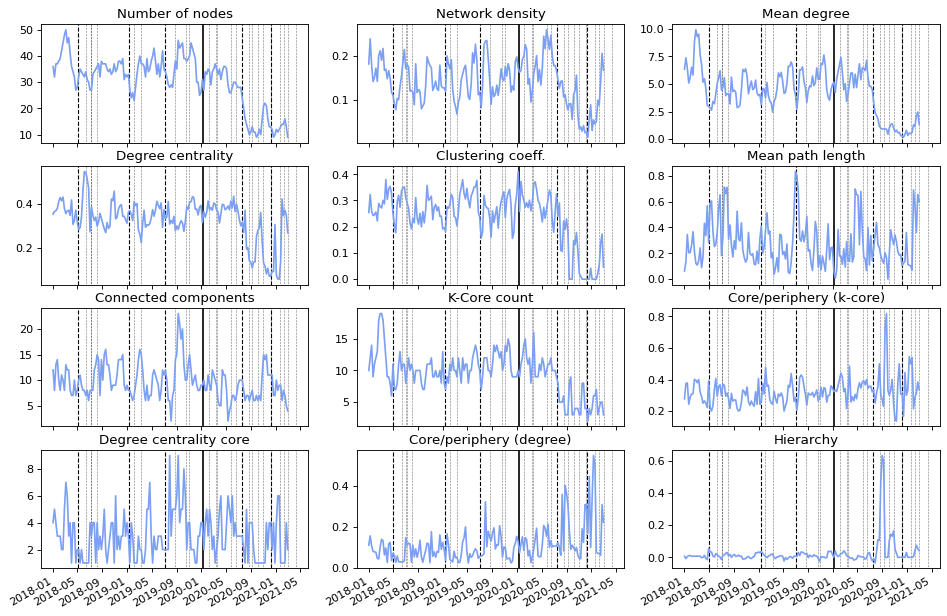

In [74]:
#for repo in repos:
    #print(repos_issues[repo])
    #print(repos_releases[repo])
    #print(repos_edits[repo])
release_dates = {}
for index, row in repos_releases['pandas'][['created_at', 'release_type']][repos_releases['pandas']['release_type'] != 'unknown'].iterrows():
    #print(datetime.strptime(str(row['created_at']), '%Y-%m-%d %H:%M:%S').date())
    day = datetime.strptime(str(row['created_at']), '%Y-%m-%d %H:%M:%S').date()
    release_dates[day] = row['release_type']

stat_names = [
    'Number of nodes',
    'Network density',
    'Mean degree',
    'Degree centrality',
    'Clustering coeff.',
    'Mean path length', 
    'Connected components',
    'K-Core count',
    'Core/periphery (k-core)',
    'Degree centrality core',
    'Core/periphery (degree)',
    'Hierarchy'
]

fig = plt.figure(figsize=(14.5, 10), dpi=80)
gs = fig.add_gridspec(4, 3, hspace=0.2, wspace=0.18)
plots = gs.subplots(sharex=True)
myFmt = mdates.DateFormatter('%Y-%m')
i = 0

for plot_row in plots:
    for plot in plot_row:
        try:
            plot.set_title(stat_names[i])
            for r in release_dates:
                if r >= min(x['pandas']):
                    if release_dates[r] == 'major':
                        plot.axvline(x=r, color='black', ls='-')
                    elif release_dates[r] == 'minor':
                        plot.axvline(x=r, color='black', ls='--', lw=1)
                    elif release_dates[r] == 'patch':
                        plot.axvline(x=r, color='black', ls=':', lw=0.5)
                    else:
                        plot.axvline(x=r, color='red', ls='-')
            plot.plot(x['servo'], [y[stat_names[i]] for y in stats['servo']], label = stat_names[i], color = "#7B9FF2")
            #plot.plot(x['repos/pandas4analysis'], [y[stat_names[i]] for y in random_stats['repos/pandas4analysis']], label = stat_names[i] + ' - random', color = "green")
            plot.xaxis.set_major_formatter(myFmt)
            i = i + 1
        except IndexError:
            pass

fig.autofmt_xdate()

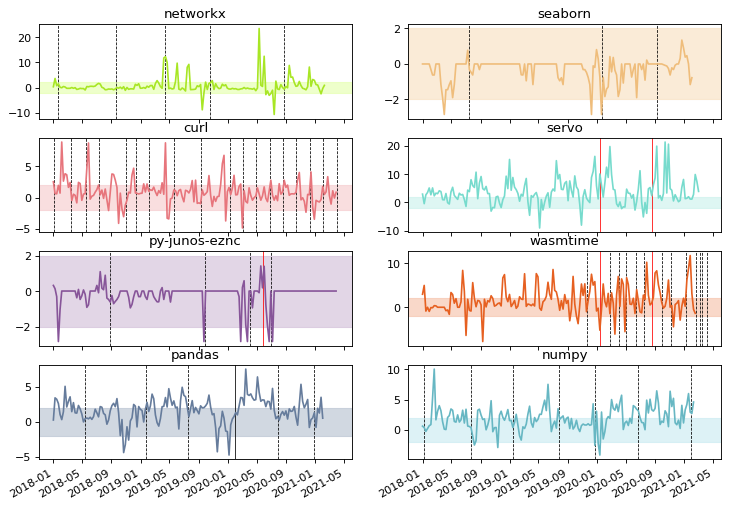

In [67]:
#for repo in repos:
    #print(repos_issues[repo])
    #print(repos_releases[repo])
    #print(repos_edits[repo])
release_dates = {}
for r in repos_releases:
    release_dates[r] = {}
    for index, row in repos_releases[r][['created_at', 'release_type']][repos_releases[r]['release_type'] != 'unknown'].iterrows():
        #print(datetime.strptime(str(row['created_at']), '%Y-%m-%d %H:%M:%S').date())
        day = datetime.strptime(str(row['created_at']), '%Y-%m-%d %H:%M:%S').date()
        release_dates[r][day] = row['release_type']

stat_names = [
    'Number of nodes',
    'Network density',
    'Mean degree',
    'Degree centrality',
    'Clustering coeff.',
    'Mean path length', 
    'Connected components',
    'K-Core count',
    'Core/periphery (k-core)',
    'Degree centrality core',
    'Core/periphery (degree)',
    'Hierarchy'
]

fig = plt.figure(figsize=(11, 8), dpi=80)
#fig = plt.figure(figsize=(5, 1.6), dpi=80)
gs = fig.add_gridspec(4, 2, hspace=0.2, wspace=0.18)
plots = gs.subplots(sharex=True)
#plot = fig.subplots(sharex=True)
myFmt = mdates.DateFormatter('%Y-%m')
i = 0

repos_for_stats = [
    'networkx',
    'seaborn',
    'curl',
    'servo',
    'py-junos-eznc',
    'wasmtime',
    'pandas',
    'numpy'
]

for plot_row in plots:
    for plot in plot_row:
    #plot = plot_row
        try:
            current_repo = repos_for_stats[i]
            #plot.suptitle(stat_names[i], fontsize=20)
            plot.set_title(current_repo)
            for r in repo_releases[current_repo]:
                if repo_releases[current_repo][r] == 'major' and current_repo != 'servo':
                    plot.axvline(x=r, color='black', ls='-', lw=0.7)
                elif repo_releases[current_repo][r] == 'minor' and current_repo != 'servo':
                    plot.axvline(x=r, color='black', ls='--', lw=0.7)
                elif repo_releases[current_repo][r] == 'patch' and current_repo != 'servo':
                #    plot.axvline(x=r, color='black', ls=':', lw=0.5)
                    pass
                elif repo_releases[current_repo][r] == 'unexpected':
                    plot.axvline(x=r, color='red', ls='-', lw=0.7)
            y = [y['Hierarchy'] if y['Hierarchy'] else 0 for y in random_stats[current_repo]]
            y = [y_ if not math.isnan(y_) and not math.isinf(y_) else 0 for y_ in y]
            plot.plot(x[current_repo], y, label = current_repo, color = repo_colors[current_repo]['shade1'])
            plot.xaxis.set_major_formatter(myFmt)
            #plot.set_ylim(ymin=0)
            #plot.spines['right'].set_visible(False)
            #plot.spines['top'].set_visible(False)
            plot.axhspan(-2, 2,color = repo_colors[current_repo]['shade2'],alpha=0.6)
            i = i + 1
        except IndexError:
            pass

fig.autofmt_xdate()

In [57]:
test = [y['Hierarchy'] if y['Hierarchy'] else 0 for y in random_stats['seaborn']]
#test = [x if math.isinf(x) else 0 for x in test]
test

[0,
 0,
 0,
 0,
 nan,
 -0.31622776601683794,
 -0.6210590034081188,
 -0.6210590034081188,
 0,
 nan,
 0,
 -1.161895003862225,
 -1.8973665961010278,
 -2.8460498941515415,
 -1.449137674618944,
 -1.449137674618944,
 -1.161895003862225,
 -0.9486832980505139,
 -1.8973665961010278,
 -1.161895003862225,
 nan,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 0.774596669241483,
 -0.3203081285069335,
 -0.4629100498862759,
 -0.6210590034081188,
 nan,
 0,
 nan,
 -0.31622776601683794,
 nan,
 0,
 nan,
 nan,
 nan,
 0,
 0,
 0,
 nan,
 nan,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 nan,
 nan,
 -0.6076436202502,
 -0.6210590034081188,
 nan,
 -0.9486832980505139,
 nan,
 nan,
 nan,
 -1.161895003862225,
 nan,
 nan,
 0,
 0,
 0,
 nan,
 nan,
 0,
 0,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.7745966692414834,
 -0.9486832980505139,
 -0.7745966692414834,
 -1.161895003862225,
 nan,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 nan,
 -0.31622776601683794,
 -0.31622776601683794,
 -0.4743416490252569,
 -0.7517421626261012,
 -1.16189500

In [66]:
a = [x if not math.isinf(x) and not math.isnan(x) else 0 for x in test] 
a

[0,
 0,
 0,
 0,
 0,
 -0.31622776601683794,
 -0.6210590034081188,
 -0.6210590034081188,
 0,
 0,
 0,
 -1.161895003862225,
 -1.8973665961010278,
 -2.8460498941515415,
 -1.449137674618944,
 -1.449137674618944,
 -1.161895003862225,
 -0.9486832980505139,
 -1.8973665961010278,
 -1.161895003862225,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.774596669241483,
 -0.3203081285069335,
 -0.4629100498862759,
 -0.6210590034081188,
 0,
 0,
 0,
 -0.31622776601683794,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.6076436202502,
 -0.6210590034081188,
 0,
 -0.9486832980505139,
 0,
 0,
 0,
 -1.161895003862225,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.7745966692414834,
 -0.9486832980505139,
 -0.7745966692414834,
 -1.161895003862225,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.31622776601683794,
 -0.31622776601683794,
 -0.4743416490252569,
 -0.7517421626261012,
 -1.161895003862225,
 -2.8460498941515415,
 -0.10614020372811304,
 -0.1939368516832024

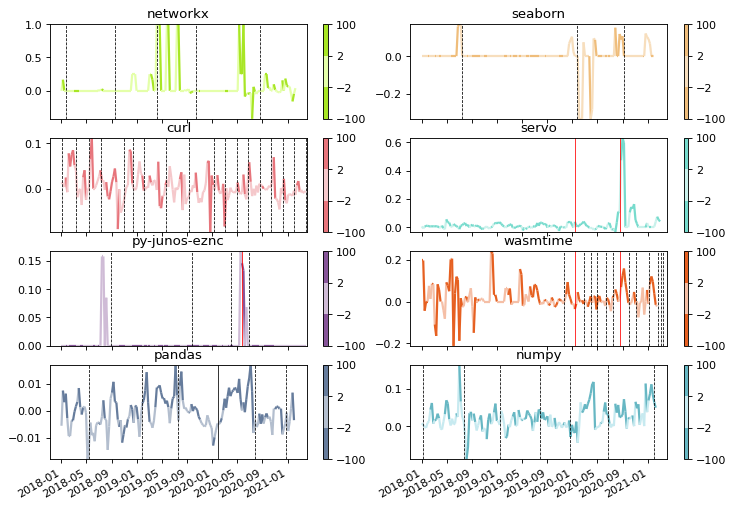

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

stat_names = [
    'Number of nodes',
    'Network density',
    'Mean degree',
    'Degree centrality',
    'Clustering coeff.',
    'Mean path length', 
    'Connected components',
    'K-Core count',
    'Core/periphery (k-core)',
    'Degree centrality core',
    'Core/periphery (degree)',
    'Hierarchy'
]

repos_for_stats = [
    'networkx',
    'seaborn',
    'curl',
    'servo',
    'py-junos-eznc',
    'wasmtime',
    'pandas',
    'numpy'
]

myFmt = mdates.DateFormatter('%Y-%m')
current_repo = 'networkx'

#fig = plt.figure(figsize=(5, 13), dpi=80)
#fig, axs = plt.subplots(4, 2)
#fig.set_size_inches(13, 13)
fig = plt.figure(figsize=(11, 8), dpi=80)
#fig = plt.figure(figsize=(5, 1.6), dpi=80)
gs = fig.add_gridspec(4, 2, hspace=0.2, wspace=0.12)
axs = gs.subplots(sharex=True)

i=0
for ax_row in axs:
    #ax = ax_row
    for ax in ax_row:
        current_repo = repos_for_stats[i]
        x_ = np.array(x[current_repo])
        y_ = np.array([y['Hierarchy'] if y['Hierarchy'] is not None else 0 for y in stats[current_repo]])
        #y2_ = np.array([y['Core/periphery (k-core)'] if y['Core/periphery (k-core)'] is not None else 0 for y in random_stats[current_repo]])
        dydx = np.array([y['Hierarchy'] if y['Hierarchy'] is not None else 0 for y in random_stats[current_repo]])

        # Create a set of line segments so that we can color them individually
        # This creates the points as a N x 1 x 2 array so that we can stack points
        # together easily to get the segments. The segments array for line collection
        # needs to be (numlines) x (points per line) x 2 (for x and y)
        inxval = mdates.date2num(x_)
        points = np.array([inxval, y_]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        ax.set_title(current_repo)
        for r in repo_releases[current_repo]:
            if repo_releases[current_repo][r] == 'major':
                ax.axvline(x=r, color='black', ls='-', lw=0.7)
            elif repo_releases[current_repo][r] == 'minor':
                ax.axvline(x=r, color='black', ls='--', lw=0.7)
            #elif repo_releases[current_repo][r] == 'patch':
            #    ax.axvline(x=r, color='black', ls=':', lw=0.5)
            elif repo_releases[current_repo][r] == 'unexpected':
                ax.axvline(x=r, color='red', ls='-', lw=0.7)

        # Use a boundary norm instead
        cmap = ListedColormap([repo_colors[current_repo]['shade1'], repo_colors[current_repo]['shade2'], repo_colors[current_repo]['shade1']])
        norm = BoundaryNorm([-100, -2, 2, 100], cmap.N)
        lc = LineCollection(segments, cmap=cmap, norm=norm)
        lc.set_array(dydx)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)
        
        #cmap = ListedColormap([repo_colors[current_repo]['shade1'], repo_colors[current_repo]['shade1'], repo_colors[current_repo]['shade1']])
        #points = np.array([inxval, y2_]).T.reshape(-1, 1, 2)
        #segments = np.concatenate([points[:-1], points[1:]], axis=1)
        #lc = LineCollection(segments, cmap=cmap, norm=norm)
        #lc.set_array(dydx)
        #lc.set_linewidth(2)
        #line = ax.add_collection(lc)
        fig.colorbar(line, ax=ax)

        #ax.set_xlim(x_.min(), x_.max())
        #ax.set_ylim(-5, 25)
        ax.set_ylim(y_.min(), y_.max())
        #ax.set_ylim(y_.min(), y_.max())
        #ax.fill_between(x_, -2, 2, alpha=0.2, color=repo_colors[current_repo]['shade1'])
        ax.xaxis.set_major_formatter(myFmt)
        i = i + 1
#plt.show()
fig.autofmt_xdate()

In [386]:
days_issues = {}
days_issues_open = {}
for r in repos_issues:
    print(r)
    days_issues[r] = {}
    try:
        #min_date = min(repos_issues[r]['created_at']).to_pydatetime().date()
        min_date = datetime(2018, 1, 1).date()
        max_date = max(max(repos_issues[r]['closed_at']).to_pydatetime().date(), max(repos_issues[r]['created_at']).to_pydatetime().date())
    except ValueError:
        print('No issues')
        continue
    days_issues[r] = {(min_date+timedelta(days=x)) : [0, 0] for x in range(0, (max_date-min_date).days + 1, 14)}
    days_issues_open[r] = {(min_date+timedelta(days=x)) : [0, 0] for x in range(0, (max_date-min_date).days + 1, 1)}
    
    #print(days_issues)
    
    for i in days_issues[r]:
        k = 0
        k2 = 0
        for j in range(-7, 6):
            #print(np.datetime64(i + timedelta(days=j)))
            #print(len(repos_issues[r]['created_at'][repos_issues[r]['created_at'].dt.date==(i + timedelta(days=j))]))
            k = k + len(repos_issues[r]['created_at'][repos_issues[r]['created_at'].dt.date==(i + timedelta(days=j))])
            k2 = k2 + len(repos_issues[r]['closed_at'][repos_issues[r]['closed_at'].dt.date==(i + timedelta(days=j))])
        days_issues[r][i] = [k, k2]
        
    for i in days_issues_open[r]:
        days_issues_open[r][i] = [len(repos_issues[r][
            ((repos_issues[r]['closed_at'].dt.date>=i) | pd.isnull(repos_issues[r]['closed_at'])) &
            (repos_issues[r]['created_at'].dt.date<=i) & 
            (repos_issues[r]['bug_or_feature'] == 'bug')
        ]), len(repos_issues[r][
            ((repos_issues[r]['closed_at'].dt.date>=i) | pd.isnull(repos_issues[r]['closed_at'])) &
            (repos_issues[r]['created_at'].dt.date<=i) & 
            (repos_issues[r]['bug_or_feature'] == 'feature')
        ])]

days_issues_open

networkx
seaborn
curl
servo
py-junos-eznc
wasmtime
pandas
numpy


{'networkx': {datetime.date(2018, 1, 1): [5, 3],
  datetime.date(2018, 1, 2): [5, 3],
  datetime.date(2018, 1, 3): [5, 3],
  datetime.date(2018, 1, 4): [5, 3],
  datetime.date(2018, 1, 5): [5, 3],
  datetime.date(2018, 1, 6): [5, 3],
  datetime.date(2018, 1, 7): [5, 3],
  datetime.date(2018, 1, 8): [5, 3],
  datetime.date(2018, 1, 9): [4, 3],
  datetime.date(2018, 1, 10): [4, 3],
  datetime.date(2018, 1, 11): [4, 3],
  datetime.date(2018, 1, 12): [4, 3],
  datetime.date(2018, 1, 13): [4, 3],
  datetime.date(2018, 1, 14): [4, 3],
  datetime.date(2018, 1, 15): [4, 3],
  datetime.date(2018, 1, 16): [4, 3],
  datetime.date(2018, 1, 17): [4, 3],
  datetime.date(2018, 1, 18): [4, 3],
  datetime.date(2018, 1, 19): [4, 3],
  datetime.date(2018, 1, 20): [4, 3],
  datetime.date(2018, 1, 21): [4, 3],
  datetime.date(2018, 1, 22): [4, 3],
  datetime.date(2018, 1, 23): [4, 3],
  datetime.date(2018, 1, 24): [5, 3],
  datetime.date(2018, 1, 25): [4, 3],
  datetime.date(2018, 1, 26): [5, 3],
  datetim

In [428]:
n_o = 0
b_o = 0
f_o = 0

for r in repos_issues:
    print('\n#############################')
    print(r)
    n = len(repos_issues[r])
    b = len(repos_issues[r][repos_issues[r]['bug_or_feature']=='bug'])
    f = len(repos_issues[r][repos_issues[r]['bug_or_feature']=='feature'])
    n_o += n
    b_o += b
    f_o += f
    print('Number of issues:       ', n)
    print('Number of bugs:         ', b, '(', "{:.2f}".format(b/n*100) ,'%)')
    print('Number of features:     ', f, '(', "{:.2f}".format(f/n*100) ,'%)')
    print('Number of unclassified: ', n-b-f, '(', "{:.2f}".format((n-b-f)/n*100) ,'%)')
    
print('\n\n OVERALL')
print('Number of issues:       ', n_o)
print('Number of bugs:         ', b_o, '(', "{:.2f}".format(b_o/n_o*100) ,'%)')
print('Number of features:     ', f_o, '(', "{:.2f}".format(f_o/n_o*100) ,'%)')
print('Number of unclassified: ', n_o-b_o-f_o, '(', "{:.2f}".format((n_o-b_o-f_o)/n_o*100) ,'%)')


#############################
networkx
Number of issues:        2524
Number of bugs:          384 ( 15.21 %)
Number of features:      54 ( 2.14 %)
Number of unclassified:  2086 ( 82.65 %)

#############################
seaborn
Number of issues:        1885
Number of bugs:          341 ( 18.09 %)
Number of features:      99 ( 5.25 %)
Number of unclassified:  1445 ( 76.66 %)

#############################
curl
Number of issues:        2866
Number of bugs:          489 ( 17.06 %)
Number of features:      35 ( 1.22 %)
Number of unclassified:  2342 ( 81.72 %)

#############################
servo
Number of issues:        11485
Number of bugs:          1016 ( 8.85 %)
Number of features:      57 ( 0.50 %)
Number of unclassified:  10412 ( 90.66 %)

#############################
py-junos-eznc
Number of issues:        475
Number of bugs:          106 ( 22.32 %)
Number of features:      5 ( 1.05 %)
Number of unclassified:  364 ( 76.63 %)

#############################
wasmtime
Number of issues:  

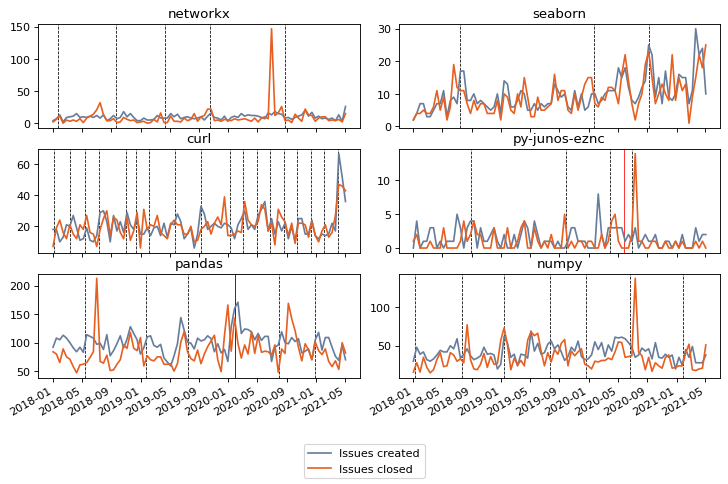

In [348]:
fig = plt.figure(figsize=(11, 6.5), dpi=80)
#fig = plt.figure(figsize=(5, 1.6), dpi=80)
gs = fig.add_gridspec(3, 2, hspace=0.2, wspace=0.12)
axs = gs.subplots(sharex=True)

repos_for_stats = [
    'networkx',
    'seaborn',
    'curl',
    #'servo',
    'py-junos-eznc',
    #'wasmtime',
    'pandas',
    'numpy'
]

i=0
for ax_row in axs:
    #ax = ax_row
    for ax in ax_row:
        current_repo = repos_for_stats[i]
        ax.set_title(current_repo)
        for r in repo_releases[current_repo]:
            if repo_releases[current_repo][r] == 'major':
                ax.axvline(x=r, color='black', ls='-', lw=0.7)
            elif repo_releases[current_repo][r] == 'minor':
                ax.axvline(x=r, color='black', ls='--', lw=0.7)
            #elif repo_releases[current_repo][r] == 'patch':
            #    ax.axvline(x=r, color='black', ls=':', lw=0.5)
            elif repo_releases[current_repo][r] == 'unexpected':
                ax.axvline(x=r, color='red', ls='-', lw=0.7)
        y_all = list(days_issues[current_repo].values())
        ax.plot(days_issues[current_repo].keys(), [y[0] for y in y_all], color='#667C9C', label='Issues created')
        ax.plot(days_issues[current_repo].keys(), [y[1] for y in y_all], color='#E66021', label='Issues closed')
        #ax.plot(days_issues[current_repo].keys(), days_issues[current_repo].values()[1])
        i = i + 1
    if i == len(repos_for_stats):
        break
fig.autofmt_xdate()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')

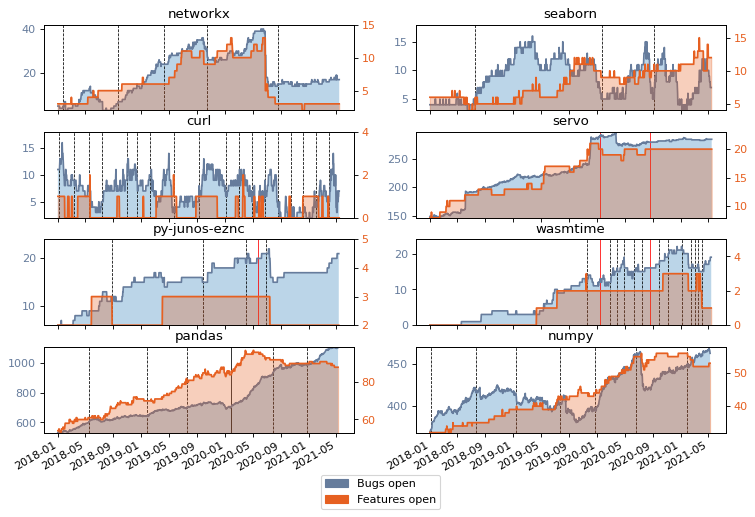

In [415]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 7.5), dpi=80)
#fig = plt.figure(figsize=(5, 1.6), dpi=80)
gs = fig.add_gridspec(4, 2, hspace=0.25, wspace=0.2)
axs = gs.subplots(sharex=True)

repos_for_stats = [
    'networkx',
    'seaborn',
    'curl',
    'servo',
    'py-junos-eznc',
    'wasmtime',
    'pandas',
    'numpy'
]

i=0
for ax_row in axs:
    #ax = ax_row
    for ax in ax_row:
        current_repo = repos_for_stats[i]
        ax.set_title(current_repo)
        for r in repo_releases[current_repo]:
            if current_repo != 'servo':
                if repo_releases[current_repo][r] == 'major':
                    ax.axvline(x=r, color='black', ls='-', lw=0.7)
                elif repo_releases[current_repo][r] == 'minor':
                    ax.axvline(x=r, color='black', ls='--', lw=0.7)
                #elif repo_releases[current_repo][r] == 'patch':
                #    ax.axvline(x=r, color='black', ls=':', lw=0.5)
                elif repo_releases[current_repo][r] == 'unexpected':
                    ax.axvline(x=r, color='red', ls='-', lw=0.7)
            else:
                if repo_releases[current_repo][r] == 'unexpected':
                    ax.axvline(x=r, color='red', ls='-', lw=0.7)
        #y_all = list(days_issues[current_repo].values())
        x = days_issues_open[current_repo].keys()
        y_all = days_issues_open[current_repo].values()
        y1 = [y[0] for y in y_all]
        y2 = [y[1] for y in y_all]
        ax.plot(x, y1, color='#667C9C', label='Bugs open')
        ax.fill_between(x, 0, y1, alpha=.3)
        ax.tick_params(axis='y', labelcolor='#667C9C')
        ax.set_ylim(min(y1), max(y1)+2)
        
        ax2 = ax.twinx()
        
        ax2.plot(x, y2, color='#E66021', label='Features open')
        ax2.fill_between(x, 0, y2, alpha=.3, color='#E66021')
        ax2.tick_params(axis='y', labelcolor='#E66021')
        ax2.set_ylim(min(y2), max(y2)+2)
        #ax.plot(days_issues[current_repo].keys(), [y[1] for y in y_all], color='#E66021', label='Issues closed')
        #ax.plot(days_issues[current_repo].keys(), days_issues[current_repo].values()[1])
        i = i + 1
    if i == len(repos_for_stats):
        break
fig.autofmt_xdate()

blue_patch = mpatches.Patch(color='#667C9C', label='Bugs open')
orange_patch = mpatches.Patch(color='#E66021', label='Features open')

handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center')
fig.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(0.44, 0.13), loc=2, borderaxespad=0.)

In [15]:
repo_colors = {
    'networkx': {
        'shade1': '#a8e625',
        'shade2': '#e4ffa9',
        'shade3': '#e698cd',
    },
    'seaborn': {
        'shade1': '#EFBD7B',
        'shade2': '#f7debd',
        'shade3': '#a79bf3',
    },
    'curl': {
        'shade1': '#E7757C',
        'shade2': '#f5c8cb',
        'shade3': '#a3ee9e',
    },
    'servo': {
        'shade1': '#77DBCD',
        'shade2': '#c9f1eb',
        'shade3': '#e6ae9f',
    },
    'py-junos-eznc': {
        'shade1': '#875599',
        'shade2': '#cfbbd6',
        'shade3': '#b8b183',
    },
    'wasmtime': {
        'shade1': '#E66021',
        'shade2': '#f5bfa6',
        'shade3': '#62c8ed',
    },
    'pandas': {
        'shade1': '#667C9C',
        'shade2': '#b3bece',
        'shade3': '#b59b8a',
    },
    'numpy': {
        'shade1': '#67b7c3',
        'shade2': '#c7eaf0',
        'shade3': '#d9a793',
    },
}

repo_releases = {
    'networkx': {
        datetime(2018, 1, 22): 'minor',
        datetime(2018, 9, 19): 'minor',
        datetime(2019, 4, 11): 'minor',
        datetime(2019, 10, 17): 'minor',
        datetime(2020, 8, 22): 'minor',
        datetime(2021, 4, 3): 'patch'
    },
    'seaborn': {
        datetime(2018, 7, 16): 'minor',
        datetime(2020, 1, 22): 'patch',
        datetime(2020, 1, 24): 'minor',
        datetime(2020, 4, 26): 'patch',
        datetime(2020, 9, 8): 'minor',
        datetime(2020, 12, 20): 'patch'
    },
    'curl': {
        datetime(2018, 1, 4): 'minor',
        datetime(2018, 3, 14): 'minor',
        datetime(2018, 5, 16): 'minor',
        datetime(2018, 7, 11): 'minor',
        datetime(2018, 9, 5): 'patch',
        datetime(2018, 10, 31): 'minor',
        datetime(2018, 12, 12): 'minor',
        datetime(2019, 2, 6): 'minor',
        datetime(2019, 3, 27): 'patch',
        datetime(2019, 5, 22): 'minor',
        datetime(2019, 6, 5): 'patch',
        datetime(2019, 7, 17): 'patch',
        datetime(2019, 7, 19): 'patch',
        datetime(2019, 9, 11): 'minor',
        datetime(2020, 1, 8): 'minor',
        datetime(2020, 3, 4): 'minor',
        datetime(2020, 3, 11): 'patch',
        datetime(2020, 4, 29): 'minor',
        datetime(2020, 6, 24): 'minor',
        datetime(2020, 7, 1): 'patch',
        datetime(2020, 8, 19): 'minor',
        datetime(2020, 10, 14): 'minor',
        datetime(2020, 12, 9): 'minor',
        datetime(2021, 2, 3): 'minor',
        datetime(2021, 3, 31): 'minor',
        datetime(2021, 4, 14): 'patch'
    },
    'py-junos-eznc': {
        datetime(2018, 5, 31): 'patch',
        datetime(2018, 8, 8): 'patch',
        datetime(2018, 8, 27): 'minor',
        datetime(2019, 4, 22): 'patch',
        datetime(2019, 9, 27): 'minor',
        datetime(2019, 12, 10): 'patch',
        datetime(2020, 4, 1): 'patch',
        datetime(2020, 4, 1): 'minor',
        datetime(2020, 4, 29): 'patch',
        datetime(2020, 5, 27): 'unexpected',
        datetime(2020, 6, 30): 'minor',
        datetime(2020, 7, 29): 'patch',
        datetime(2020, 8, 21): 'patch',
        datetime(2020, 8, 25): 'patch',
        datetime(2020, 10, 28): 'patch',
        datetime(2021, 4, 22): 'patch',
        datetime(2020, 5, 27): 'unexpected',
    },
    'wasmtime': {
        datetime(2019, 11, 19): 'minor',
        datetime(2020, 2, 26): 'minor',
        datetime(2020, 3, 31): 'minor',
        datetime(2020, 4, 30): 'minor',
        datetime(2020, 6, 12): 'minor',
        datetime(2020, 7, 16): 'minor',
        datetime(2020, 9, 29): 'minor',
        datetime(2020, 11, 5): 'minor',
        datetime(2021, 1, 7): 'minor',
        datetime(2021, 1, 19): 'patch',
        datetime(2021, 2, 17): 'minor',
        datetime(2021, 3, 5): 'minor',
        datetime(2021, 3, 16): 'minor',
        datetime(2021, 4, 5): 'minor',
        datetime(2020, 1, 15): 'unexpected',
        datetime(2020, 8, 19): 'unexpected'
    },
    'pandas': {
        datetime(2020, 1, 29): 'major',
        datetime(2020, 12, 26): 'minor',
        datetime(2020, 7, 28): 'minor',
        datetime(2019, 7, 18): 'minor',
        datetime(2019, 1, 25): 'minor',
        datetime(2018, 5, 15): 'minor',
        datetime(2018, 6, 22): 'patch',
        datetime(2018, 7, 6): 'patch',
        datetime(2018, 7, 7): 'patch',
        datetime(2018, 8, 3): 'patch',
        datetime(2019, 2, 3): 'patch',
        datetime(2019, 3, 12): 'patch',
        datetime(2019, 8, 22): 'patch',
        datetime(2019, 10, 18): 'patch',
        datetime(2019, 10, 31): 'patch',
        datetime(2020, 2, 5): 'patch',
        datetime(2020, 3, 12): 'patch',
        datetime(2020, 3, 18): 'patch',
        datetime(2020, 5, 28): 'patch',
        datetime(2020, 6, 17): 'patch',
        datetime(2020, 3, 18): 'patch',
        datetime(2020, 8, 20): 'patch',
        datetime(2020, 9, 8): 'patch',
        datetime(2020, 10, 5): 'patch',
        datetime(2020, 10, 30): 'patch',
        datetime(2020, 12, 7): 'patch',
        datetime(2021, 1, 20): 'patch',
        datetime(2021, 2, 9): 'patch'
    },
    'numpy': {
        datetime(2018, 1, 6): 'minor',
        datetime(2018, 2, 20): 'patch',
        datetime(2018, 3, 12): 'patch',
        datetime(2018, 4, 27): 'patch',
        datetime(2018, 6, 6): 'patch',
        datetime(2018, 6, 12): 'patch',
        datetime(2018, 7, 23): 'minor',
        datetime(2018, 8, 21): 'patch',
        datetime(2018, 9, 23): 'patch',
        datetime(2018, 10, 22): 'patch',
        datetime(2018, 11, 4): 'patch',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 31): 'patch',
        datetime(2019, 2, 26): 'patch',
        datetime(2019, 4, 22): 'patch',
        datetime(2019, 5, 28): 'patch',
        datetime(2019, 7, 26): 'minor',
        datetime(2019, 8, 27): 'patch',
        datetime(2019, 9, 6): 'patch',
        datetime(2019, 10, 17): 'patch',
        datetime(2019, 11, 11): 'patch',
        datetime(2019, 12, 22): 'minor',
        datetime(2020, 1, 6): 'patch',
        datetime(2020, 3, 17): 'patch',
        datetime(2020, 4, 19): 'patch',
        datetime(2020, 5, 3): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 20): 'minor',
        datetime(2020, 7, 21): 'patch',
        datetime(2020, 9, 10): 'patch',
        datetime(2020, 10, 29): 'patch',
        datetime(2020, 11, 2): 'patch',
        datetime(2021, 1, 5): 'patch',
        datetime(2021, 1, 30): 'minor',
        datetime(2021, 2, 7): 'patch',
        datetime(2021, 3, 27): 'patch'
    },
    'servo': {
        datetime(2018, 8, 20): 'minor',
        datetime(2018, 8, 20): 'minor',
        datetime(2018, 8, 21): 'minor',
        datetime(2018, 8, 22): 'minor',
        datetime(2018, 8, 23): 'minor',
        datetime(2018, 9, 4): 'minor',
        datetime(2018, 9, 6): 'minor',
        datetime(2018, 9, 10): 'minor',
        datetime(2018, 9, 14): 'patch',
        datetime(2018, 10, 1): 'patch',
        datetime(2018, 10, 2): 'patch',
        datetime(2018, 10, 13): 'patch',
        datetime(2018, 10, 16): 'patch',
        datetime(2018, 10, 17): 'patch',
        datetime(2018, 10, 18): 'patch',
        datetime(2018, 10, 18): 'patch',
        datetime(2018, 10, 18): 'patch',
        datetime(2018, 10, 18): 'minor',
        datetime(2018, 10, 19): 'patch',
        datetime(2018, 10, 19): 'patch',
        datetime(2018, 10, 23): 'minor',
        datetime(2018, 10, 25): 'patch',
        datetime(2018, 10, 26): 'minor',
        datetime(2018, 10, 26): 'patch',
        datetime(2018, 10, 29): 'patch',
        datetime(2018, 10, 29): 'patch',
        datetime(2018, 10, 30): 'patch',
        datetime(2018, 10, 31): 'minor',
        datetime(2018, 11, 1): 'major',
        datetime(2018, 11, 2): 'patch',
        datetime(2018, 11, 5): 'patch',
        datetime(2018, 11, 6): 'patch',
        datetime(2018, 11, 7): 'patch',
        datetime(2018, 11, 7): 'patch',
        datetime(2018, 11, 7): 'patch',
        datetime(2018, 11, 13): 'patch',
        datetime(2018, 11, 14): 'patch',
        datetime(2018, 11, 15): 'patch',
        datetime(2018, 11, 21): 'patch',
        datetime(2018, 11, 23): 'minor',
        datetime(2018, 11, 26): 'minor',
        datetime(2018, 11, 27): 'minor',
        datetime(2018, 11, 27): 'patch',
        datetime(2018, 11, 29): 'patch',
        datetime(2018, 11, 29): 'patch',
        datetime(2018, 11, 29): 'patch',
        datetime(2018, 11, 30): 'minor',
        datetime(2018, 12, 4): 'patch',
        datetime(2018, 12, 5): 'minor',
        datetime(2018, 12, 18): 'patch',
        datetime(2018, 12, 19): 'minor',
        datetime(2018, 12, 19): 'patch',
        datetime(2018, 12, 19): 'patch',
        datetime(2018, 12, 21): 'minor',
        datetime(2019, 1, 3): 'minor',
        datetime(2019, 1, 3): 'patch',
        datetime(2019, 1, 3): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 11): 'minor',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 14): 'minor',
        datetime(2019, 1, 14): 'patch',
        datetime(2019, 1, 17): 'patch',
        datetime(2019, 1, 17): 'minor',
        datetime(2019, 1, 17): 'minor',
        datetime(2019, 1, 21): 'patch',
        datetime(2019, 1, 21): 'patch',
        datetime(2019, 1, 21): 'minor',
        datetime(2019, 1, 24): 'patch',
        datetime(2019, 1, 24): 'patch',
        datetime(2019, 1, 29): 'patch',
        datetime(2019, 1, 29): 'minor',
        datetime(2019, 1, 30): 'minor',
        datetime(2019, 1, 31): 'minor',
        datetime(2019, 2, 1): 'patch',
        datetime(2019, 2, 7): 'patch',
        datetime(2019, 2, 7): 'minor',
        datetime(2019, 2, 7): 'patch',
        datetime(2019, 2, 11): 'patch',
        datetime(2019, 2, 11): 'patch',
        datetime(2019, 2, 11): 'patch',
        datetime(2019, 2, 11): 'patch',
        datetime(2019, 2, 12): 'patch',
        datetime(2019, 2, 13): 'minor',
        datetime(2019, 2, 14): 'patch',
        datetime(2019, 2, 15): 'patch',
        datetime(2019, 2, 19): 'patch',
        datetime(2019, 2, 19): 'minor',
        datetime(2019, 2, 19): 'minor',
        datetime(2019, 2, 22): 'minor',
        datetime(2019, 2, 22): 'patch',
        datetime(2019, 2, 22): 'minor',
        datetime(2019, 2, 23): 'patch',
        datetime(2019, 3, 4): 'minor',
        datetime(2019, 3, 5): 'patch',
        datetime(2019, 3, 5): 'patch',
        datetime(2019, 3, 5): 'patch',
        datetime(2019, 3, 6): 'minor',
        datetime(2019, 3, 6): 'patch',
        datetime(2019, 3, 11): 'patch',
        datetime(2019, 3, 11): 'patch',
        datetime(2019, 3, 11): 'patch',
        datetime(2019, 3, 12): 'minor',
        datetime(2019, 3, 14): 'patch',
        datetime(2019, 3, 14): 'minor',
        datetime(2019, 3, 19): 'patch',
        datetime(2019, 3, 19): 'patch',
        datetime(2019, 3, 19): 'patch',
        datetime(2019, 3, 29): 'minor',
        datetime(2019, 4, 2): 'patch',
        datetime(2019, 4, 5): 'patch',
        datetime(2019, 4, 5): 'patch',
        datetime(2019, 4, 5): 'patch',
        datetime(2019, 4, 10): 'minor',
        datetime(2019, 4, 10): 'minor',
        datetime(2019, 4, 10): 'patch',
        datetime(2019, 4, 11): 'patch',
        datetime(2019, 4, 11): 'patch',
        datetime(2019, 4, 11): 'patch',
        datetime(2019, 4, 11): 'patch',
        datetime(2019, 4, 11): 'minor',
        datetime(2019, 4, 11): 'minor',
        datetime(2019, 4, 12): 'minor',
        datetime(2019, 4, 12): 'minor',
        datetime(2019, 4, 16): 'major',
        datetime(2019, 4, 22): 'patch',
        datetime(2019, 4, 24): 'patch',
        datetime(2019, 4, 24): 'patch',
        datetime(2019, 4, 29): 'patch',
        datetime(2019, 5, 7): 'minor',
        datetime(2019, 5, 8): 'patch',
        datetime(2019, 5, 9): 'patch',
        datetime(2019, 5, 14): 'minor',
        datetime(2019, 5, 16): 'minor',
        datetime(2019, 5, 17): 'patch',
        datetime(2019, 5, 21): 'patch',
        datetime(2019, 5, 21): 'patch',
        datetime(2019, 5, 21): 'minor',
        datetime(2019, 5, 21): 'minor',
        datetime(2019, 5, 21): 'minor',
        datetime(2019, 5, 21): 'minor',
        datetime(2019, 5, 22): 'patch',
        datetime(2019, 5, 29): 'patch',
        datetime(2019, 5, 30): 'patch',
        datetime(2019, 6, 4): 'minor',
        datetime(2019, 6, 5): 'patch',
        datetime(2019, 6, 5): 'minor',
        datetime(2019, 6, 6): 'minor',
        datetime(2019, 6, 6): 'patch',
        datetime(2019, 6, 6): 'patch',
        datetime(2019, 6, 6): 'patch',
        datetime(2019, 6, 6): 'patch',
        datetime(2019, 6, 7): 'patch',
        datetime(2019, 6, 7): 'patch',
        datetime(2019, 6, 10): 'minor',
        datetime(2019, 6, 11): 'minor',
        datetime(2019, 6, 12): 'patch',
        datetime(2019, 6, 14): 'patch',
        datetime(2019, 6, 14): 'patch',
        datetime(2019, 6, 24): 'patch',
        datetime(2019, 6, 24): 'patch',
        datetime(2019, 7, 3): 'patch',
        datetime(2019, 7, 4): 'patch',
        datetime(2019, 7, 4): 'patch',
        datetime(2019, 7, 5): 'patch',
        datetime(2019, 7, 8): 'minor',
        datetime(2019, 7, 9): 'minor',
        datetime(2019, 7, 9): 'patch',
        datetime(2019, 7, 11): 'patch',
        datetime(2019, 7, 11): 'patch',
        datetime(2019, 7, 15): 'patch',
        datetime(2019, 7, 15): 'patch',
        datetime(2019, 7, 16): 'patch',
        datetime(2019, 7, 17): 'minor',
        datetime(2019, 7, 19): 'patch',
        datetime(2019, 7, 19): 'patch',
        datetime(2019, 7, 23): 'patch',
        datetime(2019, 7, 25): 'patch',
        datetime(2019, 7, 25): 'patch',
        datetime(2019, 7, 25): 'patch',
        datetime(2019, 7, 26): 'patch',
        datetime(2019, 8, 1): 'patch',
        datetime(2019, 8, 6): 'patch',
        datetime(2019, 8, 6): 'minor',
        datetime(2019, 8, 8): 'patch',
        datetime(2019, 8, 12): 'patch',
        datetime(2019, 8, 12): 'patch',
        datetime(2019, 8, 15): 'patch',
        datetime(2019, 8, 19): 'patch',
        datetime(2019, 8, 19): 'patch',
        datetime(2019, 8, 20): 'patch',
        datetime(2019, 8, 20): 'patch',
        datetime(2019, 8, 21): 'minor',
        datetime(2019, 8, 21): 'patch',
        datetime(2019, 8, 26): 'patch',
        datetime(2019, 8, 26): 'patch',
        datetime(2019, 9, 11): 'patch',
        datetime(2019, 9, 16): 'minor',
        datetime(2019, 9, 24): 'patch',
        datetime(2019, 9, 25): 'patch',
        datetime(2019, 9, 25): 'patch',
        datetime(2019, 9, 25): 'major',
        datetime(2019, 10, 1): 'minor',
        datetime(2019, 10, 1): 'patch',
        datetime(2019, 10, 2): 'patch',
        datetime(2019, 10, 3): 'patch',
        datetime(2019, 10, 4): 'patch',
        datetime(2019, 10, 4): 'patch',
        datetime(2019, 10, 7): 'patch',
        datetime(2019, 10, 9): 'patch',
        datetime(2019, 10, 11): 'minor',
        datetime(2019, 10, 11): 'patch',
        datetime(2019, 10, 11): 'minor',
        datetime(2019, 10, 11): 'patch',
        datetime(2019, 10, 15): 'patch',
        datetime(2019, 10, 15): 'patch',
        datetime(2019, 10, 17): 'patch',
        datetime(2019, 10, 17): 'minor',
        datetime(2019, 10, 18): 'patch',
        datetime(2019, 10, 22): 'patch',
        datetime(2019, 10, 22): 'minor',
        datetime(2019, 10, 28): 'patch',
        datetime(2019, 10, 28): 'patch',
        datetime(2019, 10, 29): 'minor',
        datetime(2019, 10, 31): 'patch',
        datetime(2019, 10, 31): 'patch',
        datetime(2019, 11, 1): 'patch',
        datetime(2019, 11, 1): 'minor',
        datetime(2019, 11, 1): 'patch',
        datetime(2019, 11, 4): 'patch',
        datetime(2019, 11, 5): 'patch',
        datetime(2019, 11, 5): 'patch',
        datetime(2019, 11, 6): 'minor',
        datetime(2019, 11, 13): 'minor',
        datetime(2019, 11, 14): 'patch',
        datetime(2019, 11, 14): 'minor',
        datetime(2019, 11, 25): 'minor',
        datetime(2019, 11, 26): 'patch',
        datetime(2019, 11, 26): 'patch',
        datetime(2019, 11, 26): 'patch',
        datetime(2019, 11, 29): 'minor',
        datetime(2019, 12, 11): 'minor',
        datetime(2019, 12, 11): 'minor',
        datetime(2019, 12, 16): 'patch',
        datetime(2019, 12, 17): 'patch',
        datetime(2019, 12, 20): 'patch',
        datetime(2019, 12, 30): 'minor',
        datetime(2020, 1, 6): 'patch',
        datetime(2020, 1, 8): 'minor',
        datetime(2020, 1, 9): 'patch',
        datetime(2020, 1, 15): 'patch',
        datetime(2020, 1, 17): 'minor',
        datetime(2020, 1, 17): 'patch',
        datetime(2020, 1, 17): 'minor',
        datetime(2020, 1, 17): 'minor',
        datetime(2020, 1, 20): 'patch',
        datetime(2020, 1, 20): 'patch',
        datetime(2020, 1, 21): 'patch',
        datetime(2020, 1, 21): 'patch',
        datetime(2020, 1, 22): 'patch',
        datetime(2020, 1, 22): 'minor',
        datetime(2020, 1, 24): 'patch',
        datetime(2020, 1, 27): 'minor',
        datetime(2020, 1, 29): 'patch',
        datetime(2020, 1, 30): 'patch',
        datetime(2020, 1, 31): 'patch',
        datetime(2020, 1, 31): 'minor',
        datetime(2020, 2, 5): 'patch',
        datetime(2020, 2, 6): 'minor',
        datetime(2020, 2, 6): 'patch',
        datetime(2020, 2, 7): 'patch',
        datetime(2020, 2, 10): 'patch',
        datetime(2020, 2, 11): 'patch',
        datetime(2020, 2, 11): 'patch',
        datetime(2020, 2, 12): 'patch',
        datetime(2020, 2, 14): 'minor',
        datetime(2020, 2, 14): 'patch',
        datetime(2020, 2, 14): 'patch',
        datetime(2020, 2, 18): 'patch',
        datetime(2020, 2, 20): 'patch',
        datetime(2020, 2, 20): 'patch',
        datetime(2020, 2, 20): 'patch',
        datetime(2020, 2, 24): 'patch',
        datetime(2020, 2, 25): 'minor',
        datetime(2020, 2, 26): 'patch',
        datetime(2020, 2, 28): 'minor',
        datetime(2020, 3, 2): 'minor',
        datetime(2020, 3, 5): 'minor',
        datetime(2020, 3, 5): 'patch',
        datetime(2020, 3, 6): 'patch',
        datetime(2020, 3, 11): 'minor',
        datetime(2020, 3, 11): 'patch',
        datetime(2020, 3, 16): 'minor',
        datetime(2020, 3, 16): 'patch',
        datetime(2020, 3, 17): 'patch',
        datetime(2020, 3, 17): 'patch',
        datetime(2020, 3, 18): 'patch',
        datetime(2020, 3, 18): 'patch',
        datetime(2020, 3, 20): 'patch',
        datetime(2020, 3, 24): 'patch',
        datetime(2020, 3, 24): 'minor',
        datetime(2020, 3, 25): 'patch',
        datetime(2020, 3, 30): 'major',
        datetime(2020, 3, 30): 'minor',
        datetime(2020, 4, 2): 'patch',
        datetime(2020, 4, 3): 'patch',
        datetime(2020, 4, 6): 'patch',
        datetime(2020, 4, 7): 'patch',
        datetime(2020, 4, 7): 'minor',
        datetime(2020, 4, 9): 'patch',
        datetime(2020, 4, 13): 'patch',
        datetime(2020, 4, 13): 'patch',
        datetime(2020, 4, 14): 'patch',
        datetime(2020, 4, 14): 'minor',
        datetime(2020, 4, 14): 'patch',
        datetime(2020, 4, 17): 'patch',
        datetime(2020, 4, 17): 'patch',
        datetime(2020, 4, 21): 'patch',
        datetime(2020, 4, 21): 'patch',
        datetime(2020, 4, 21): 'patch',
        datetime(2020, 4, 21): 'patch',
        datetime(2020, 4, 22): 'patch',
        datetime(2020, 4, 23): 'patch',
        datetime(2020, 4, 23): 'patch',
        datetime(2020, 4, 28): 'patch',
        datetime(2020, 5, 4): 'minor',
        datetime(2020, 5, 8): 'patch',
        datetime(2020, 5, 11): 'patch',
        datetime(2020, 5, 13): 'patch',
        datetime(2020, 5, 15): 'patch',
        datetime(2020, 5, 15): 'patch',
        datetime(2020, 5, 20): 'patch',
        datetime(2020, 5, 20): 'minor',
        datetime(2020, 5, 20): 'major',
        datetime(2020, 5, 20): 'minor',
        datetime(2020, 5, 20): 'major',
        datetime(2020, 5, 20): 'minor',
        datetime(2020, 5, 21): 'minor',
        datetime(2020, 5, 22): 'major',
        datetime(2020, 5, 22): 'patch',
        datetime(2020, 5, 25): 'patch',
        datetime(2020, 5, 25): 'patch',
        datetime(2020, 5, 26): 'minor',
        datetime(2020, 5, 26): 'major',
        datetime(2020, 5, 26): 'patch',
        datetime(2020, 5, 26): 'patch',
        datetime(2020, 5, 27): 'minor',
        datetime(2020, 6, 3): 'patch',
        datetime(2020, 6, 3): 'patch',
        datetime(2020, 6, 3): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 4): 'minor',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 4): 'patch',
        datetime(2020, 6, 5): 'minor',
        datetime(2020, 6, 5): 'patch',
        datetime(2020, 6, 8): 'minor',
        datetime(2020, 6, 9): 'patch',
        datetime(2020, 6, 9): 'patch',
        datetime(2020, 6, 11): 'patch',
        datetime(2020, 6, 12): 'minor',
        datetime(2020, 6, 12): 'patch',
        datetime(2020, 6, 12): 'major',
        datetime(2020, 6, 12): 'patch',
        datetime(2020, 6, 19): 'minor',
        datetime(2020, 6, 22): 'major',
        datetime(2020, 6, 23): 'minor',
        datetime(2020, 6, 23): 'patch',
        datetime(2020, 6, 23): 'patch',
        datetime(2020, 6, 24): 'patch',
        datetime(2020, 6, 24): 'patch',
        datetime(2020, 6, 24): 'patch',
        datetime(2020, 6, 25): 'patch',
        datetime(2020, 6, 26): 'minor',
        datetime(2020, 6, 26): 'major',
        datetime(2020, 6, 29): 'patch',
        datetime(2020, 6, 29): 'patch',
        datetime(2020, 6, 30): 'minor',
        datetime(2020, 7, 2): 'major',
        datetime(2020, 7, 2): 'patch',
        datetime(2020, 7, 2): 'minor',
        datetime(2020, 7, 9): 'minor',
        datetime(2020, 7, 9): 'major',
        datetime(2020, 7, 10): 'patch',
        datetime(2020, 7, 17): 'patch',
        datetime(2020, 7, 20): 'patch',
        datetime(2020, 7, 20): 'minor',
        datetime(2020, 7, 23): 'patch',
        datetime(2020, 7, 27): 'major',
        datetime(2020, 7, 29): 'patch',
        datetime(2020, 8, 4): 'patch',
        datetime(2020, 8, 4): 'minor',
        datetime(2020, 8, 4): 'major',
        datetime(2020, 8, 6): 'minor',
        datetime(2020, 8, 8): 'major',
        datetime(2020, 8, 11): 'minor',
        datetime(2020, 8, 12): 'major',
        datetime(2020, 8, 12): 'minor',
        datetime(2020, 8, 24): 'major',
        datetime(2020, 8, 25): 'patch',
        datetime(2020, 8, 27): 'minor',
        datetime(2020, 8, 27): 'major',
        datetime(2020, 8, 31): 'minor',
        datetime(2020, 8, 31): 'patch',
        datetime(2020, 8, 31): 'patch',
        datetime(2020, 9, 2): 'minor',
        datetime(2020, 9, 9): 'minor',
        datetime(2020, 9, 11): 'minor',
        datetime(2020, 9, 12): 'major',
        datetime(2020, 9, 15): 'patch',
        datetime(2020, 9, 15): 'patch',
        datetime(2020, 9, 15): 'patch',
        datetime(2020, 9, 16): 'patch',
        datetime(2020, 9, 16): 'minor',
        datetime(2020, 9, 16): 'patch',
        datetime(2020, 9, 16): 'minor',
        datetime(2020, 9, 16): 'major',
        datetime(2020, 9, 16): 'patch',
        datetime(2020, 9, 16): 'patch',
        datetime(2020, 9, 16): 'minor',
        datetime(2020, 9, 25): 'minor',
        datetime(2020, 9, 29): 'patch',
        datetime(2020, 9, 29): 'patch',
        datetime(2020, 9, 29): 'patch',
        datetime(2020, 9, 29): 'patch',
        datetime(2020, 9, 29): 'patch',
        datetime(2020, 9, 30): 'patch',
        datetime(2020, 10, 1): 'patch',
        datetime(2020, 10, 1): 'minor',
        datetime(2020, 10, 1): 'patch',
        datetime(2020, 10, 13): 'patch',
        datetime(2020, 10, 13): 'patch',
        datetime(2020, 10, 14): 'patch',
        datetime(2020, 10, 19): 'patch',
        datetime(2020, 10, 19): 'minor',
        datetime(2020, 10, 22): 'patch',
        datetime(2020, 10, 22): 'minor',
        datetime(2020, 10, 27): 'patch',
        datetime(2020, 10, 27): 'minor',
        datetime(2020, 10, 29): 'minor',
        datetime(2020, 10, 29): 'patch',
        datetime(2020, 11, 3): 'minor',
        datetime(2020, 11, 4): 'patch',
        datetime(2020, 11, 6): 'patch',
        datetime(2020, 11, 6): 'patch',
        datetime(2020, 11, 9): 'minor',
        datetime(2020, 11, 9): 'minor',
        datetime(2020, 11, 10): 'patch',
        datetime(2020, 11, 12): 'patch',
        datetime(2020, 11, 16): 'minor',
        datetime(2020, 11, 17): 'patch',
        datetime(2020, 11, 19): 'patch',
        datetime(2020, 11, 23): 'patch',
        datetime(2020, 11, 23): 'patch',
        datetime(2020, 11, 23): 'patch',
        datetime(2020, 11, 24): 'patch',
        datetime(2020, 11, 27): 'patch',
        datetime(2020, 11, 30): 'patch',
        datetime(2020, 11, 30): 'minor',
        datetime(2020, 11, 30): 'minor',
        datetime(2020, 12, 1): 'patch',
        datetime(2020, 12, 3): 'patch',
        datetime(2020, 12, 4): 'minor',
        datetime(2020, 12, 7): 'minor',
        datetime(2020, 12, 9): 'patch',
        datetime(2020, 12, 11): 'patch',
        datetime(2020, 12, 11): 'patch',
        datetime(2020, 12, 11): 'patch',
        datetime(2020, 12, 11): 'patch',
        datetime(2020, 12, 16): 'patch',
        datetime(2020, 12, 16): 'patch',
        datetime(2020, 12, 17): 'patch',
        datetime(2020, 12, 23): 'patch',
        datetime(2021, 1, 4): 'minor',
        datetime(2021, 1, 5): 'minor',
        datetime(2021, 1, 5): 'minor',
        datetime(2021, 1, 6): 'patch',
        datetime(2021, 1, 7): 'patch',
        datetime(2021, 1, 7): 'patch',
        datetime(2021, 1, 7): 'patch',
        datetime(2021, 1, 7): 'minor',
        datetime(2021, 1, 8): 'patch',
        datetime(2021, 1, 11): 'minor',
        datetime(2021, 1, 11): 'patch',
        datetime(2021, 1, 14): 'patch',
        datetime(2021, 1, 18): 'minor',
        datetime(2021, 1, 20): 'patch',
        datetime(2021, 1, 20): 'minor',
        datetime(2021, 1, 21): 'patch',
        datetime(2021, 1, 29): 'minor',
        datetime(2021, 2, 2): 'patch',
        datetime(2021, 2, 3): 'minor',
        datetime(2021, 2, 17): 'patch',
        datetime(2021, 3, 2): 'patch',
        datetime(2021, 3, 8): 'minor',
        datetime(2021, 3, 10): 'patch',
        datetime(2021, 3, 10): 'minor',
        datetime(2021, 3, 16): 'patch',
        datetime(2021, 3, 16): 'patch',
        datetime(2021, 3, 16): 'patch',
        datetime(2021, 3, 17): 'minor',
        datetime(2021, 3, 17): 'minor',
        datetime(2021, 3, 18): 'patch',
        datetime(2021, 3, 18): 'minor',
        datetime(2021, 3, 18): 'patch',
        datetime(2021, 3, 24): 'minor',
        datetime(2021, 3, 26): 'minor',
        datetime(2021, 4, 10): 'major',
        datetime(2021, 4, 10): 'minor',
        datetime(2021, 4, 11): 'patch',
        datetime(2021, 4, 20): 'patch',
        datetime(2021, 4, 20): 'patch',
        datetime(2021, 5, 13): 'minor',
        datetime(2020, 1, 15): 'unexpected',
        datetime(2020, 8, 19): 'unexpected',
        }
}